In [2]:
import numpy as np
import matplotlib.pyplot as plt
import linear_regression as linreg

# https://www.kaggle.com/datasets/harishkumardatalab/housing-price-prediction/data
# Load data
data = np.loadtxt(
    './data/Housing.csv',
    delimiter=',',
    skiprows=1,
    dtype=[
        ('price', 'float'),
        ('area', 'float'),
        ('bedrooms', 'float'),
        ('bathrooms', 'float'),
        ('stories', 'float'),
        ('mainroad', 'U3'),
        ('guestroom', 'U3'),
        ('basement', 'U3'),
        ('hotwaterheating', 'U3'),
        ('airconditioning', 'U3'),
        ('parking', 'float'),
        ('prefarea', 'U3'),
        ('furnishingstatus', 'U30')
    ]
)

In [3]:
data[0]

(13300000., 7420., 4., 2., 3., 'yes', 'no', 'no', 'no', 'yes', 2., 'yes', 'furnished')

In [4]:
encode = lambda x, string: 1. if x == string else 0.
encode_yes_no = lambda x: encode(x, 'yes')
encode_furnish_none = lambda x: encode(x, 'unfurnished')
encode_furnish_semi = lambda x: encode(x, 'semi-furnished')
encode_furnish_full = lambda x: encode(x, 'furnished')

def convert_data(raw_data):
    x_train = []
    y_train = []
    price_index = 0

    for house in raw_data:
        (
            price,
            area,
            bedrooms,
            bathrooms,
            stories,
            mainroad,
            guestroom,
            basement,
            hotwaterheating,
            airconditioning,
            parking,
            prefarea,
            furnishingstatus
        ) = house

        # price (millions)
        price /= 1e6

        # area (thousands of square feet)
        area /= 1e3
        
        y_train.append(price)
        mainroad = encode_yes_no(mainroad)
        guestroom = encode_yes_no(guestroom)
        basement = encode_yes_no(basement)
        hotwaterheating = encode_yes_no(hotwaterheating)
        airconditioning = encode_yes_no(airconditioning)
        prefarea = encode_yes_no(prefarea)

        # Perform one-hot encoding for features with more than 2 values
        furnish_none = encode_furnish_none(furnishingstatus)
        furnish_semi = encode_furnish_semi(furnishingstatus)
        furnish_full = encode_furnish_full(furnishingstatus)

        x_train.append([
            area,
            bedrooms,
            bathrooms,
            stories,
            mainroad,
            guestroom,
            basement,
            hotwaterheating,
            airconditioning,
            parking,
            prefarea,
            furnish_none,
            furnish_semi,
            furnish_full,
        ])
        

    return np.array(x_train), np.array(y_train)
    

In [5]:
x_train, y_train = convert_data(data)
for i in range(5):
    print(x_train[i])

[7.42 4.   2.   3.   1.   0.   0.   0.   1.   2.   1.   0.   0.   1.  ]
[8.96 4.   4.   4.   1.   0.   0.   0.   1.   3.   0.   0.   0.   1.  ]
[9.96 3.   2.   2.   1.   0.   1.   0.   0.   2.   1.   0.   1.   0.  ]
[7.5 4.  2.  2.  1.  0.  1.  0.  1.  3.  1.  0.  0.  1. ]
[7.42 4.   1.   2.   1.   1.   1.   0.   1.   2.   0.   0.   0.   1.  ]


In [6]:
from sklearn.linear_model import SGDRegressor
x_sgdr=x_train

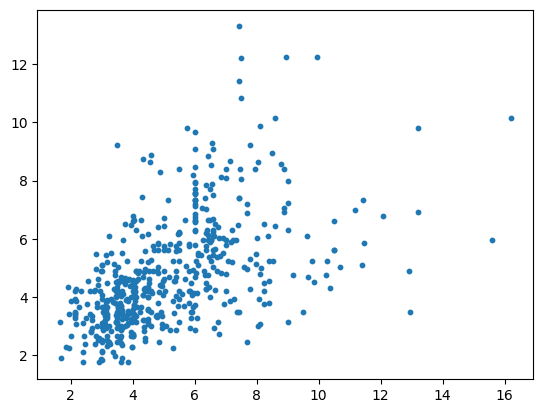

In [7]:
# Visualize some relationships
fig, ax = plt.subplots()

x_area = x_sgdr[:, 0]
ax.scatter(x_area, y_train, s=10)

In [8]:
sgdr = SGDRegressor(max_iter=10000)
sgdr.fit(x_sgdr, y_train)
print(sgdr)
print(f"Iterations: {sgdr.n_iter_}, Weights updated: {sgdr.t_}")

SGDRegressor(max_iter=10000)
Iterations: 26, Weights updated: 14171.0


In [9]:
b_sgdr = sgdr.intercept_[0]
w_sgdr = sgdr.coef_
print(f"w: {w_sgdr}, b:{b_sgdr}")

w: [ 0.25897403  0.11562576  0.96264424  0.47484853  0.36054064  0.30812707
  0.37947429  0.42199889  0.81658921  0.29712124  0.61556128 -0.27696762
  0.11613241  0.16466503], b:0.0038998673317083583


In [10]:
y_pred = []

for i in range(len(x_train)):
    y_pred.append(linreg.model(x_train[i], w_sgdr, b_sgdr))

Text(0, 0.5, 'Price (millions)')

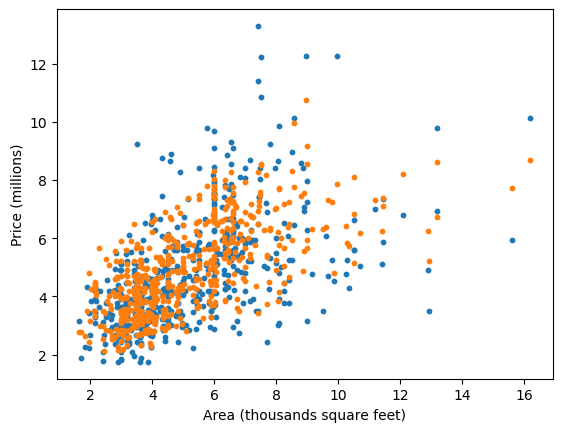

In [11]:
# Visualize some relationships
fig, ax = plt.subplots()

x_area = x_sgdr[:, 0]
ax.scatter(x_area, y_train, s=10)
ax.scatter(x_area, y_pred, s=10)
ax.set_xlabel('Area (thousands square feet)')
ax.set_ylabel('Price (millions)')

The linear model catches the most populated area very well, but does poorly for outliers.

In [12]:
w_init = np.array(np.random.uniform(0, 20, size=x_train.shape[1]))
b_init = np.random.uniform(0, 20)
learning_rate = 4e-2
num_iter = 2000
epsilon = None

costs, w, b = linreg.fit(x_train, y_train, w_init, b_init, learning_rate, num_iter, epsilon)

[0] 13800.083131532858
[100] 18.526126764646374
[200] 6.460086256616327
[300] 3.715391393458652
[400] 2.5817130520448015
[500] 1.9367766536969233
[600] 1.5206499556304611
[700] 1.2378847519426566
[800] 1.040971065179332
[900] 0.902074642726355
[1000] 0.8034081757475415
[1100] 0.7330391782129596
[1200] 0.6827365217263008
[1300] 0.6467298859177621
[1400] 0.6209359385528714
[1500] 0.6024492826134389
[1600] 0.5891960105878599
[1700] 0.5796929359934963
[1800] 0.5728781395182226
[1900] 0.567990802830173


Text(0, 0.5, 'Price (millions)')

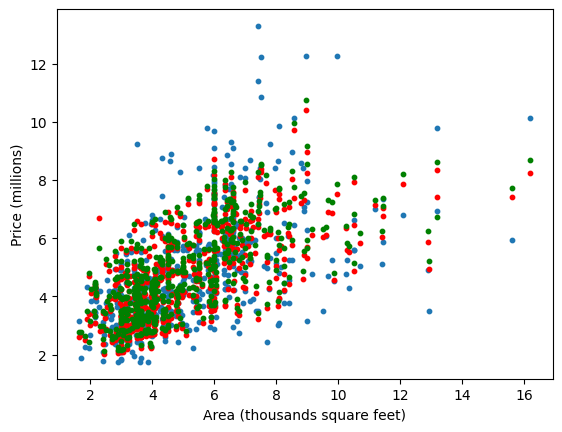

In [13]:
y_pred=[linreg.model(x, w, b) for x in x_train]
y_sgdr=[linreg.model(x, w_sgdr, b_sgdr) for x in x_train]

# Visualize some relationships
fig, ax = plt.subplots()

x_area = x_train[:, 0]
ax.scatter(x_area, y_train, s=10)
ax.scatter(x_area, y_pred, s=10, c='red')
ax.scatter(x_area, y_sgdr, s=10, c='green')
ax.set_xlabel('Area (thousands square feet)')
ax.set_ylabel('Price (millions)')

The result of our implementation is close to that of `SGDRegressor`